In [2]:
persons = list(['GrandjeanMartin','HumanisticaDH','yrochat','giovanni1085','frederickaplan','TimeMachineEU','dariorodighiero'])

In [3]:
import twitter as t
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
CONSUMER_KEY ='lMVbGYfXPotzwSL0nz7gxNmct'
CONSUMER_SECRET = 'TgIfzjq0sAlxymxvXVFuNY8tBAdHuFtMlFV82YIZ865u2cI93p'
OAUTH_TOKEN = '1007900557485502464-CQRzloyKctNmQDEyHexcofY9xf5jNn'
OAUTH_TOKEN_SECRET = 'UYQudjgJNb51Umfpf4I2PzH0vKWTMoRO9jImK39qp10Jj'

auth = t.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = t.Twitter(auth=auth)

In [9]:
results = [twitter_api.statuses.user_timeline(screen_name = person, count=200) for person in persons]

# User analysis

In [58]:
def f(result):
    return pd.DataFrame([['https://twitter.com/'+item['user']['screen_name'],item['user']['location'],item['user']['description'],item['user']['followers_count'],item['user']['favourites_count'],item['user']['profile_banner_url']] for item in result])


In [64]:
dfs = [f(result) for result in results]

In [65]:
dftot = pd.concat(dfs)
dftot = dftot.drop_duplicates()

In [66]:
dftot.columns = pd.Index(['user','location','description','followers','favourites','background'])

In [79]:
dftot.index = np.arange(0,dftot.shape[0])

In [99]:
dftot.sort_values(by='followers',ascending=False)

,user,location,description,followers,favourites,background
0,https://twitter.com/GrandjeanMartin,Switzerland,Junior Lecturer @UNIL and @EPFL • Dr Contempor...,17323,9888,https://pbs.twimg.com/profile_banners/36968904...
4,https://twitter.com/frederickaplan,Lausanne,Prof in Digital Humanities at EPFL https://t.c...,5638,44,https://pbs.twimg.com/profile_banners/10161492...
2,https://twitter.com/yrochat,"Lausanne, Switzerland",«chercheur»,2778,59583,https://pbs.twimg.com/profile_banners/15516583...
1,https://twitter.com/HumanisticaDH,Francophonie,Association francophone des humanités numériqu...,2450,151,https://pbs.twimg.com/profile_banners/25433125...
6,https://twitter.com/dariorodighiero,"Lausanne, Switzerland",Digital Humanist deeply versed in design pract...,948,2647,https://pbs.twimg.com/profile_banners/87419607...
5,https://twitter.com/TimeMachineEU,,Digitally simulating 5000 years of European hi...,390,29,https://pbs.twimg.com/profile_banners/10040430...
3,https://twitter.com/giovanni1085,"London, England","Senior research data scientist @turinginst, Co...",148,521,https://pbs.twimg.com/profile_banners/10156815...


# Hashtag analysis

In [147]:
'''for result in results:
    for item in result:
        for hashtag in item['entities']['hashtags']:
            print(hashtag['text'])'''
df_hashtag = pd.DataFrame([hashtag['text'] for result in results for item in result for hashtag in item['entities']['hashtags']])

In [143]:
# pedagogic purpose :
'''b = [['abc'],['def'],['ghi']]
test = list()
for a in b:
    for c in a:
        for d in c:
            test.append(d)
print(test)  
print([d for a in b for c in a for d in c])'''

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']


In [182]:
df_hashtag = pd.DataFrame([[hashtag['text'],item['user']['name'],item['retweet_count'],item['favorite_count']] for result in results for item in result for hashtag in item['entities']['hashtags']])

In [183]:
hashtagdata = df_hashtag.groupby(0).mean().sort_values(by=2, ascending=False).sort_index()

In [185]:
hashtagdata['size'] = df_hashtag[0].value_counts().sort_index()
hashtagdata.columns = pd.Index(['retweet','favourite','size'])

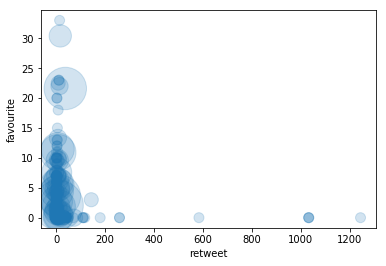

In [197]:
hashtagdata.plot.scatter(x='retweet',y='favourite',s=hashtagdata['size']*100,alpha=0.2)

In [198]:
hashtagdata[(hashtagdata['favourite']>20)&(hashtagdata['favourite']<25)]

,retweet,favourite,size
0,,,
DH2018,37.333333,21.611111,18
DHLAB,13.666667,22.000000,3
Replica,8.000000,22.500000,2
Warhol,11.000000,23.000000,1
digitise,11.000000,23.000000,1
